In [1]:
# generate edges 
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
import pickle

# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 16})
plt.rcParams['mathtext.fontset'] = 'stix'

In [2]:
rev = pickle.load(open( "./vanilla/spark-omp26-total.pickle", "rb" ))
rek = pickle.load(open( "./omp26w1p5/spark-omp26w1p5-total.pickle", "rb" ))
rekk = pickle.load(open( "./omp26wp5/spark-omp26wp5-total.pickle", "rb" ))
remm = pickle.load(open( "./omp31/spark-omp31-total.pickle", "rb" ))
rem = pickle.load(open( "./omp21/spark-omp21-total.pickle", "rb" ))

In [3]:
rev0 = pickle.load(open( "./vanilla/cut5e11sub0.pickle", "rb" ))
rek0 = pickle.load(open( "./omp26w1p5/abunsub0.pickle", "rb" ))
rekk0 = pickle.load(open( "./omp26wp5/abunsub0.pickle", "rb" ))
remm0 = pickle.load(open( "./omp31/abunsub0.pickle", "rb" ))
rem0 = pickle.load(open( "./omp21/abunsub0.pickle", "rb" ))

In [4]:
remm

,linklen,gcomp,scomp,n2comp,n3comp,n4comp,n5cumcomp,avglcc,transitivity
0,1.0,0.000002,0.000002,501508.0,75868.0,15062.0,4971.0,0.397034,0.401898
1,1.1,0.000002,0.000002,590022.0,108830.0,25794.0,10880.0,0.422688,0.428968
2,1.2,0.000003,0.000002,662239.0,143470.0,39178.0,20460.0,0.444915,0.453382
3,1.3,0.000003,0.000003,714624.0,176684.0,55175.0,34604.0,0.462304,0.472476
4,1.4,0.000004,0.000003,750232.0,206289.0,71497.0,53636.0,0.477689,0.488520
5,1.5,0.000006,0.000005,768740.0,231369.0,86980.0,77313.0,0.492164,0.503490
6,1.6,0.000010,0.000006,772393.0,251420.0,101608.0,104239.0,0.504930,0.516698
7,1.7,0.000011,0.000008,763845.0,265115.0,113834.0,133659.0,0.516129,0.527776
8,1.8,0.000015,0.000014,745703.0,273404.0,123832.0,163789.0,0.526374,0.537833
9,1.9,0.000016,0.000015,719731.0,276511.0,130567.0,194070.0,0.535538,0.546286


In [5]:
rev1 = pickle.load(open( "./vanilla/cut5e11sub1.pickle", "rb" ))
rev2 = pickle.load(open( "./vanilla/cut5e11sub2.pickle", "rb" ))
rev3 = pickle.load(open( "./vanilla/cut5e11sub3.pickle", "rb" ))
rev4 = pickle.load(open( "./vanilla/cut5e11sub4.pickle", "rb" ))
rev5 = pickle.load(open( "./vanilla/cut5e11sub5.pickle", "rb" ))
rev6 = pickle.load(open( "./vanilla/cut5e11sub6.pickle", "rb" ))
rev7 = pickle.load(open( "./vanilla/cut5e11sub7.pickle", "rb" ))

In [6]:
import gc
gc.collect()

15

In [7]:
rem.head(100)

,linklen,gcomp,scomp,n2comp,n3comp,n4comp,n5cumcomp,avglcc,transitivity
0,1.0,0.000002,0.000002,562243.0,97206.0,22193.0,8907.0,0.405570,0.413121
1,1.1,0.000003,0.000003,644544.0,134043.0,36159.0,17930.0,0.431135,0.440074
2,1.2,0.000004,0.000003,705870.0,169663.0,52482.0,32217.0,0.453180,0.463568
3,1.3,0.000004,0.000004,746477.0,202346.0,69592.0,51918.0,0.471944,0.483166
4,1.4,0.000005,0.000005,766766.0,229566.0,86381.0,76802.0,0.487165,0.499402
5,1.5,0.000006,0.000006,769817.0,250447.0,101678.0,105708.0,0.501545,0.514436
6,1.6,0.000008,0.000007,759430.0,263982.0,114475.0,137139.0,0.513486,0.526634
7,1.7,0.000013,0.000009,738836.0,271808.0,123665.0,169291.0,0.524625,0.537319
8,1.8,0.000019,0.000016,711662.0,273510.0,130868.0,199879.0,0.535516,0.547395
9,1.9,0.000021,0.000019,678152.0,271110.0,134285.0,228466.0,0.545446,0.556013


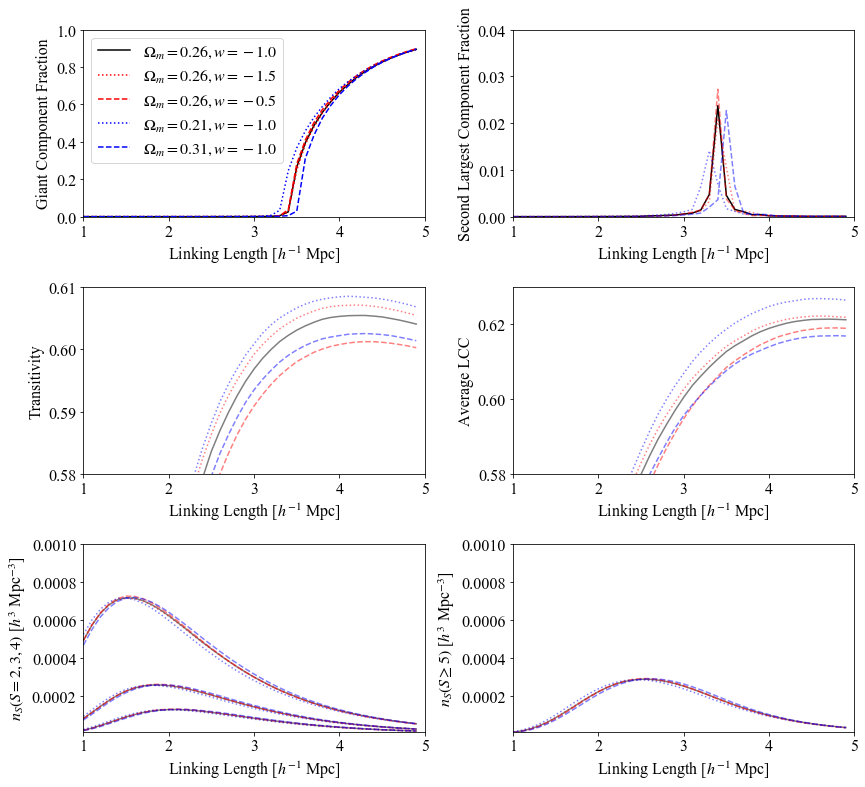

In [8]:
# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 16})
plt.rcParams['mathtext.fontset'] = 'stix'

lenmax = 5.0
lenmin = 1.0
#vsys = np.double(512.0*512.0*512.0)
vsys = np.double(1024.0*1024.0*1024.0)



fig = plt.figure(figsize=(12,11))

plt.subplot(321)
plt.axis([lenmin,lenmax,0,1.0])
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'Linking Length [$h^{-1}$ Mpc]')
plt.ylabel(r'Giant Component Fraction')


plt.plot(rev.linklen.values,rev.gcomp.values,linestyle = '-',color='k',alpha=1.0,label=r'$\Omega_m=0.26,w=-1.0$')
#plt.plot(rev2.linklen.values,rev2.gcomp.values,linestyle = '-',color='green',alpha=0.5,label='Vanilla512')


plt.plot(rek.linklen.values,rek.gcomp.values,linestyle = ':',color='r',alpha=1.0,label=r'$\Omega_m=0.26,w=-1.5$')
plt.plot(rekk.linklen.values,rekk.gcomp.values,linestyle = '--',color='r',alpha=1.0,label=r'$\Omega_m=0.26,w=-0.5$')

plt.plot(rem.linklen.values,rem.gcomp.values,linestyle = ':',color='b',alpha=1.0,label=r'$\Omega_m=0.21,w=-1.0$')
plt.plot(remm.linklen.values,remm.gcomp.values,linestyle = '--',color='b',alpha=1.0,label=r'$\Omega_m=0.31,w=-1.0$')




plt.legend(loc=2)



plt.subplot(322)
plt.axis([lenmin,lenmax,0,0.04])
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'Linking Length [$h^{-1}$ Mpc]')
plt.ylabel(r'Second Largest Component Fraction')


plt.plot(rev.linklen.values,rev.scomp.values,linestyle = '-',color='k',alpha=1.0)
#plt.plot(rev3.linklen.values,rev3.scomp.values,linestyle = '-',color='green',alpha=0.5)






plt.plot(rek.linklen.values,rek.scomp.values,linestyle = ':',color='r',alpha=0.5)
plt.plot(rekk.linklen.values,rekk.scomp.values,linestyle = '--',color='r',alpha=0.5)

plt.plot(remm.linklen.values,remm.scomp.values,linestyle = '--',color='b',alpha=0.5)
plt.plot(rem.linklen.values,rem.scomp.values,linestyle = ':',color='b',alpha=0.5)








#plt.text(0.2,0.4,'CMB COLD Spots',color='b')


plt.subplot(323)
plt.axis([lenmin,lenmax,0.58,0.61])
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'Linking Length [$h^{-1}$ Mpc]')
plt.ylabel(r'Transitivity')

plt.plot(rev.linklen.values,rev.transitivity.values,color='k',alpha=0.5,linestyle = '-')



plt.plot(rek.linklen.values,rek.transitivity.values,color='r',alpha=0.5,linestyle = ':')
plt.plot(rekk.linklen.values,rekk.transitivity.values,color='r',alpha=0.5,linestyle = '--')

plt.plot(remm.linklen.values,remm.transitivity.values,color='b',alpha=0.5,linestyle = '--')
plt.plot(rem.linklen.values,rem.transitivity.values,color='b',alpha=0.5,linestyle = ':')






#plt.plot(re.linklen.values,re.localcc.values,color='green',label='average lcc')
#plt.scatter(re.linklen.values,re.localcc.values,color='green',s=10,marker='x',label='average lcc')



plt.subplot(324)
plt.axis([lenmin,lenmax,0.58,0.63])
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'Linking Length [$h^{-1}$ Mpc]')
plt.ylabel(r'Average LCC')


plt.plot(rev.linklen.values,rev.avglcc.values,color='k',alpha=0.5,linestyle = '-')


plt.plot(rek.linklen.values,rek.avglcc.values,color='r',alpha=0.5,linestyle = ':')
plt.plot(rekk.linklen.values,rekk.avglcc.values,color='r',alpha=0.5,linestyle = '--')

plt.plot(remm.linklen.values,remm.avglcc.values,color='b',alpha=0.5,linestyle = '--')
plt.plot(rem.linklen.values,rem.avglcc.values,color='b',alpha=0.5,linestyle = ':')








plt.subplot(325)
plt.axis([lenmin,lenmax,0.00001,0.001])
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'Linking Length [$h^{-1}$ Mpc]')
plt.ylabel(r'$n_S (S=2,3,4)$ [$h^{3}$ Mpc$^{-3}$]')


plt.plot(rev.linklen.values,rev.n2comp.values/vsys,color='k',alpha=0.5,linestyle = '-')


plt.plot(rek.linklen.values,rek.n2comp.values/vsys,color='r',alpha=0.5,linestyle = ':')
plt.plot(rekk.linklen.values,rekk.n2comp.values/vsys,color='r',alpha=0.5,linestyle = '--')

plt.plot(remm.linklen.values,remm.n2comp.values/vsys,color='b',alpha=0.5,linestyle = '--')
plt.plot(rem.linklen.values,rem.n2comp.values/vsys,color='b',alpha=0.5,linestyle = ':')




plt.plot(rev.linklen.values,rev.n3comp.values/vsys,color='k',alpha=0.5,linestyle = '-')
#plt.plot(rev1.linklen.values,rev1.n2comp.values/vsys,color='b',alpha=0.5,linestyle = ':')
#plt.plot(rev2.linklen.values,rev2.n2comp.values/vsys,color='b',alpha=0.5,linestyle = ':')

plt.plot(rek.linklen.values,rek.n3comp.values/vsys,color='r',alpha=0.5,linestyle = ':')
plt.plot(rekk.linklen.values,rekk.n3comp.values/vsys,color='r',alpha=0.5,linestyle = '--')

plt.plot(remm.linklen.values,remm.n3comp.values/vsys,color='b',alpha=0.5,linestyle = '--')
plt.plot(rem.linklen.values,rem.n3comp.values/vsys,color='b',alpha=0.5,linestyle = ':')



plt.plot(rev.linklen.values,rev.n4comp.values/vsys,color='k',alpha=0.5,linestyle = '-')
#plt.plot(rev1.linklen.values,rev1.n2comp.values/vsys,color='b',alpha=0.5,linestyle = ':')
#plt.plot(rev2.linklen.values,rev2.n2comp.values/vsys,color='b',alpha=0.5,linestyle = ':')

plt.plot(rek.linklen.values,rek.n4comp.values/vsys,color='r',alpha=0.5,linestyle = ':')
plt.plot(rekk.linklen.values,rekk.n4comp.values/vsys,color='r',alpha=0.5,linestyle = '--')

plt.plot(remm.linklen.values,remm.n4comp.values/vsys,color='b',alpha=0.5,linestyle = '--')
plt.plot(rem.linklen.values,rem.n4comp.values/vsys,color='b',alpha=0.5,linestyle = ':')





plt.subplot(326)
plt.axis([lenmin,lenmax,0.00001,0.001])
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'Linking Length [$h^{-1}$ Mpc]')
plt.ylabel(r'$n_S (S\geq 5)$ [$h^{3}$ Mpc$^{-3}$]')



plt.plot(rev.linklen.values,rev.n5cumcomp.values/vsys,color='k',alpha=0.5,linestyle = '-')
#plt.plot(rev1.linklen.values,rev1.n5cumcomp.values/vsys,color='k',alpha=0.5,linestyle = '-')
#plt.plot(rev2.linklen.values,rev2.n5cumcomp.values/vsys,color='k',alpha=0.5,linestyle = '-')
#plt.plot(rev3.linklen.values,rev3.n5cumcomp.values/vsys,color='k',alpha=0.5,linestyle = '-')



plt.plot(rek.linklen.values,rek.n5cumcomp.values/vsys,color='r',alpha=0.5,linestyle = ':')
plt.plot(rekk.linklen.values,rekk.n5cumcomp.values/vsys,color='r',alpha=0.5,linestyle = '--')

plt.plot(remm.linklen.values,remm.n5cumcomp.values/vsys,color='b',alpha=0.5,linestyle = '--')
plt.plot(rem.linklen.values,rem.n5cumcomp.values/vsys,color='b',alpha=0.5,linestyle = ':')







plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
fig.savefig("graphCompAbunTotal.pdf")
fig.savefig("graphCompAbunTotal.png")
plt.show()


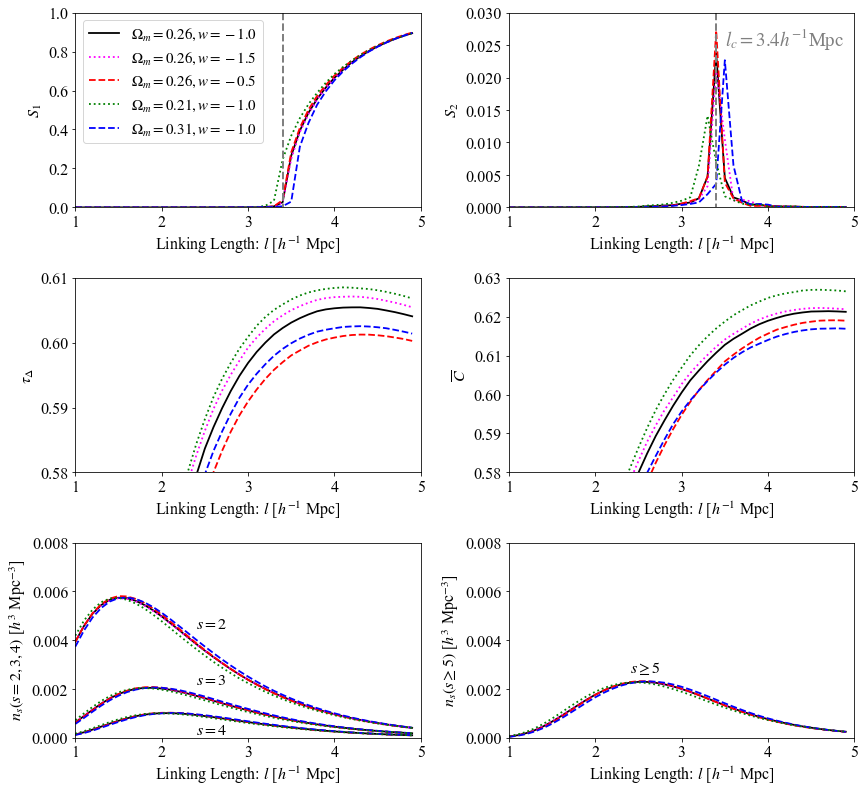

In [9]:
# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 16})
plt.rcParams['mathtext.fontset'] = 'stix'

lenmax = 5.0
lenmin = 1.0
vsys = np.double(512.0*512.0*512.0)

fig = plt.figure(figsize=(12,11))

plt.subplot(321)
plt.axis([lenmin,lenmax,0,1.0])
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'Linking Length: $l$ [$h^{-1}$ Mpc]')
plt.ylabel(r'$S_1$')


plt.plot(rev.linklen.values,rev.gcomp.values,linestyle = '-',color='k',linewidth=1.8,alpha=1.0,label=r'$\Omega_m=0.26,w=-1.0$')



plt.plot(rek.linklen.values,rek.gcomp.values,linestyle = ':',color='magenta',linewidth=1.8,alpha=1.0,label=r'$\Omega_m=0.26,w=-1.5$')
plt.plot(rekk.linklen.values,rekk.gcomp.values,linestyle = '--',color='r',linewidth=1.8,alpha=1.0,label=r'$\Omega_m=0.26,w=-0.5$')

plt.plot(rem.linklen.values,rem.gcomp.values,linestyle = ':',color='green',linewidth=1.8,alpha=1.0,label=r'$\Omega_m=0.21,w=-1.0$')
plt.plot(remm.linklen.values,remm.gcomp.values,linestyle = '--',color='b',linewidth=1.8,alpha=1.0,label=r'$\Omega_m=0.31,w=-1.0$')

plt.plot([3.4,3.4],[-100,100],color='grey',linewidth=2.0,linestyle='--')

#plt.text(3.45,0.86,r'$l_c = 3.4 h^{-1}$Mpc',color='grey',fontsize=16)
#plt.text(3.65,0.1,r'$l_c = 3.4 h^{-1}$Mpc',color='grey',fontsize=17)


plt.legend(loc=2,fontsize=15)



plt.subplot(322)
plt.axis([lenmin,lenmax,0,0.03])
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'Linking Length: $l$ [$h^{-1}$ Mpc]')
plt.ylabel(r'$S_2$')


plt.plot(rev.linklen.values,rev.scomp.values,linestyle = '-',color='k',linewidth=1.8,alpha=1.0)



plt.plot(rek.linklen.values,rek.scomp.values,linestyle = ':',color='magenta',linewidth=1.8,alpha=1.0)
plt.plot(rekk.linklen.values,rekk.scomp.values,linestyle = '--',color='r',linewidth=1.8,alpha=1.0)

plt.plot(remm.linklen.values,remm.scomp.values,linestyle = '--',color='b',linewidth=1.8,alpha=1.0)
plt.plot(rem.linklen.values,rem.scomp.values,linestyle = ':',color='green',linewidth=1.8,alpha=1.0)


plt.plot([3.4,3.4],[-100,100],color='grey',linewidth=2.0,linestyle='--')

plt.text(3.5,0.025,r'$l_c = 3.4 h^{-1}$Mpc',color='grey',fontsize=19)

#plt.text(3.5,0.026,r'$l_c = 3.4 h^{-1}$Mpc',color='grey',fontsize=16)



#plt.text(0.2,0.4,'CMB COLD Spots',color='b')


plt.subplot(323)
plt.axis([lenmin,lenmax,0.58,0.61])
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'Linking Length: $l$ [$h^{-1}$ Mpc]')
plt.ylabel(r'$\tau_\Delta$')

plt.plot(rev.linklen.values,rev.transitivity.values,color='k',linewidth=1.8,alpha=1.0,linestyle = '-')




plt.plot(rek.linklen.values,rek.transitivity.values,color='magenta',linewidth=1.8,alpha=1.0,linestyle = ':')
plt.plot(rekk.linklen.values,rekk.transitivity.values,color='r',linewidth=1.8,alpha=1.0,linestyle = '--')

plt.plot(remm.linklen.values,remm.transitivity.values,color='b',linewidth=1.8,alpha=1.0,linestyle = '--')
plt.plot(rem.linklen.values,rem.transitivity.values,color='green',linewidth=1.8,alpha=1.0,linestyle = ':')






#plt.plot(re.linklen.values,re.localcc.values,color='green',label='average lcc')
#plt.scatter(re.linklen.values,re.localcc.values,color='green',s=10,marker='x',label='average lcc')



plt.subplot(324)
plt.axis([lenmin,lenmax,0.58,0.63])
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'Linking Length: $l$ [$h^{-1}$ Mpc]')
plt.ylabel(r'$\overline{C}$')


plt.plot(rev.linklen.values,rev.avglcc.values,color='k',linewidth=1.8,alpha=1.0,linestyle = '-')


plt.plot(rek.linklen.values,rek.avglcc.values,color='magenta',linewidth=1.8,alpha=1.0,linestyle = ':')
plt.plot(rekk.linklen.values,rekk.avglcc.values,color='r',linewidth=1.8,alpha=1.0,linestyle = '--')

plt.plot(remm.linklen.values,remm.avglcc.values,color='b',linewidth=1.8,alpha=1.0,linestyle = '--')
plt.plot(rem.linklen.values,rem.avglcc.values,color='green',linewidth=1.8,alpha=1.0,linestyle = ':')








plt.subplot(325)
plt.axis([lenmin,lenmax,0.00001,0.008])
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'Linking Length: $l$ [$h^{-1}$ Mpc]')
plt.ylabel(r'$n_s (s=2,3,4)$ [$h^{3}$ Mpc$^{-3}$]')


plt.plot(rev.linklen.values,rev.n2comp.values/vsys,color='k',linewidth=1.8,alpha=1.0,linestyle = '-')


plt.plot(rek.linklen.values,rek.n2comp.values/vsys,color='magenta',linewidth=1.8,alpha=1.0,linestyle = ':')
plt.plot(rekk.linklen.values,rekk.n2comp.values/vsys,color='r',linewidth=1.8,alpha=1.0,linestyle = '--')

plt.plot(remm.linklen.values,remm.n2comp.values/vsys,color='b',linewidth=1.8,alpha=1.0,linestyle = '--')
plt.plot(rem.linklen.values,rem.n2comp.values/vsys,color='green',linewidth=1.8,alpha=1.0,linestyle = ':')




plt.plot(rev.linklen.values,rev.n3comp.values/vsys,color='k',linewidth=1.8,alpha=1.0,linestyle = '-')
#plt.plot(rev1.linklen.values,rev1.n2comp.values/vsys,color='b',linewidth=1.8,alpha=1.0,linestyle = ':')
#plt.plot(rev2.linklen.values,rev2.n2comp.values/vsys,color='b',linewidth=1.8,alpha=1.0,linestyle = ':')

plt.plot(rek.linklen.values,rek.n3comp.values/vsys,color='magenta',linewidth=1.8,alpha=1.0,linestyle = ':')
plt.plot(rekk.linklen.values,rekk.n3comp.values/vsys,color='r',linewidth=1.8,alpha=1.0,linestyle = '--')

plt.plot(remm.linklen.values,remm.n3comp.values/vsys,color='b',linewidth=1.8,alpha=1.0,linestyle = '--')
plt.plot(rem.linklen.values,rem.n3comp.values/vsys,color='green',linewidth=1.8,alpha=1.0,linestyle = ':')



plt.plot(rev.linklen.values,rev.n4comp.values/vsys,color='k',linewidth=1.8,alpha=1.0,linestyle = '-')
#plt.plot(rev1.linklen.values,rev1.n2comp.values/vsys,color='b',linewidth=1.8,alpha=1.0,linestyle = ':')
#plt.plot(rev2.linklen.values,rev2.n2comp.values/vsys,color='b',linewidth=1.8,alpha=1.0,linestyle = ':')

plt.plot(rek.linklen.values,rek.n4comp.values/vsys,color='magenta',linewidth=1.8,alpha=1.0,linestyle = ':')
plt.plot(rekk.linklen.values,rekk.n4comp.values/vsys,color='r',linewidth=1.8,alpha=1.0,linestyle = '--')

plt.plot(remm.linklen.values,remm.n4comp.values/vsys,color='b',linewidth=1.8,alpha=1.0,linestyle = '--')
plt.plot(rem.linklen.values,rem.n4comp.values/vsys,color='green',linewidth=1.8,alpha=1.0,linestyle = ':')

plt.text(2.4,0.0045,r'$s = 2$',color='black')
plt.text(2.4,0.0022,r'$s = 3$',color='black')
plt.text(2.4,0.00014,r'$s = 4$',color='black')

plt.subplot(326)
plt.axis([lenmin,lenmax,0.00001,0.008])
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'Linking Length: $l$ [$h^{-1}$ Mpc]')
plt.ylabel(r'$n_s (s\geq 5)$ [$h^{3}$ Mpc$^{-3}$]')



plt.plot(rev.linklen.values,rev.n5cumcomp.values/vsys,color='k',linewidth=1.8,alpha=1.0,linestyle = '-')
#plt.plot(rev1.linklen.values,rev1.n5cumcomp.values/vsys,color='k',linewidth=1.8,alpha=1.0,linestyle = '-')
#plt.plot(rev2.linklen.values,rev2.n5cumcomp.values/vsys,color='k',linewidth=1.8,alpha=1.0,linestyle = '-')
#plt.plot(rev3.linklen.values,rev3.n5cumcomp.values/vsys,color='k',linewidth=1.8,alpha=1.0,linestyle = '-')



plt.plot(rek.linklen.values,rek.n5cumcomp.values/vsys,color='magenta',linewidth=1.8,alpha=1.0,linestyle = ':')
plt.plot(rekk.linklen.values,rekk.n5cumcomp.values/vsys,color='r',linewidth=1.8,alpha=1.0,linestyle = '--')

plt.plot(remm.linklen.values,remm.n5cumcomp.values/vsys,color='b',linewidth=1.8,alpha=1.0,linestyle = '--')
plt.plot(rem.linklen.values,rem.n5cumcomp.values/vsys,color='green',linewidth=1.8,alpha=1.0,linestyle = ':')


plt.text(2.4,0.0027,r'$s \geq 5$',color='black')




plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)
fig.savefig("graphCompAbunTotal.pdf")
fig.savefig("graphCompAbunTotal.eps")
plt.show()



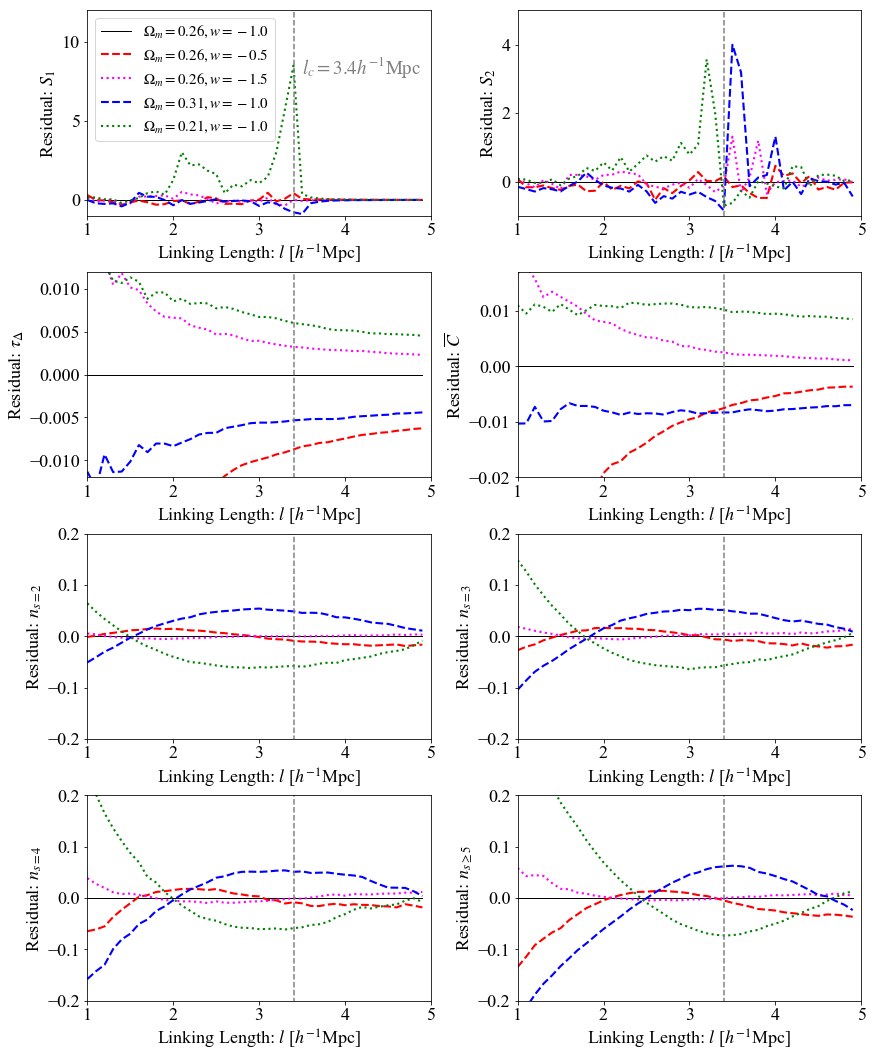

In [10]:
# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 18})
plt.rcParams['mathtext.fontset'] = 'stix'

lenmax = 5.0
lenmin = 1.0
vsys = np.double(512.0*512.0*512.0)

fig = plt.figure(figsize=(12,14.7))





plt.subplot(421)
plt.axis([lenmin,lenmax,-1.0,12])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Residual: $S_1$')
plt.xlabel(r'Linking Length: $l$ [$h^{-1}$Mpc]')

plt.plot(rev.linklen.values,np.zeros(len(rev.linklen.values)),color='k',linewidth=1.0,label=r'$\Omega_m=0.26,w=-1.0$')

plt.plot(rekk.linklen.values,rekk.gcomp.values/rev.gcomp.values - 1.0,linestyle = '--',linewidth=2.1,color='r',label=r'$\Omega_m=0.26,w=-0.5$')
plt.plot(rek.linklen.values,rek.gcomp.values/rev.gcomp.values - 1.0,linestyle = ':',linewidth=2.1,color='magenta',label=r'$\Omega_m=0.26,w=-1.5$')
plt.plot(remm.linklen.values,remm.gcomp.values/rev.gcomp.values - 1.0,linestyle = '--',linewidth=2.1,color='b',label=r'$\Omega_m=0.31,w=-1.0$')
plt.plot(rem.linklen.values,rem.gcomp.values/rev.gcomp.values - 1.0,linestyle = ':',linewidth=2.1,color='green',label=r'$\Omega_m=0.21,w=-1.0$')

plt.text(3.5,8,r'$l_c = 3.4 h^{-1}$Mpc',color='grey',fontsize=19)

plt.plot([3.4,3.4],[-100,100],color='grey',linewidth=1.5,linestyle='--')

plt.legend(loc=2,fontsize=15)

plt.subplot(422)
plt.axis([lenmin,lenmax,-1.0,5.0])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.xlabel(r'Linking Length: $l$ [$h^{-1}$Mpc]')
plt.ylabel(r'Residual: $S_2$')

plt.plot(rev.linklen.values,np.zeros(len(rev.linklen.values)),color='k',linewidth=1,label=r'$\Omega_m=0.26,w=-1.0$')


plt.plot(rekk.linklen.values,rekk.scomp.values/rev.scomp.values - 1.0,linestyle = '--',linewidth=2.1,color='r',label=r'$\Omega_m=0.26,w=-0.5$')
plt.plot(rek.linklen.values,rek.scomp.values/rev.scomp.values - 1.0,linestyle = ':',linewidth=2.1,color='magenta',label=r'$\Omega_m=0.26,w=-1.5$')
plt.plot(remm.linklen.values,remm.scomp.values/rev.scomp.values - 1.0,linestyle = '--',linewidth=2.1,color='b',label=r'$\Omega_m=0.31,w=-1.0$')
plt.plot(rem.linklen.values,rem.scomp.values/rev.scomp.values - 1.0,linestyle = ':',linewidth=2.1,color='green',label=r'$\Omega_m=0.21,w=-1.0$')



plt.plot([3.4,3.4],[-100,100],color='grey',linewidth=1.5,linestyle='--')
#plt.legend(loc=2)

plt.subplot(423)
plt.axis([lenmin,lenmax,-0.012,0.012])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Residual: $\tau_\Delta$')
plt.xlabel(r'Linking Length: $l$ [$h^{-1}$Mpc]')

plt.plot(rev.linklen.values,np.zeros(len(rev.linklen.values)),color='k',linewidth=1)



plt.plot(rekk.linklen.values,rekk.transitivity.values/rev.transitivity.values - 1.0,linestyle = '--',linewidth=2.1,color='r')
plt.plot(rek.linklen.values,rek.transitivity.values/rev.transitivity.values - 1.0,linestyle = ':',linewidth=2.1,color='magenta')
plt.plot(remm.linklen.values,remm.transitivity.values/rev.transitivity.values - 1.0,linestyle = '--',linewidth=2.1,color='b')
plt.plot(rem.linklen.values,rem.transitivity.values/rev.transitivity.values - 1.0,linestyle = ':',linewidth=2.1,color='green')

plt.plot([3.4,3.4],[-100,100],color='grey',linewidth=1.5,linestyle='--')

plt.subplot(424)
plt.axis([lenmin,lenmax,-0.02,0.017])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Residual: $\overline{C}$')
plt.xlabel(r'Linking Length: $l$ [$h^{-1}$Mpc]')

plt.plot(rev.linklen.values,np.zeros(len(rev.linklen.values)),color='k',linewidth=1)


plt.plot(rekk.linklen.values,rekk.avglcc.values/rev.avglcc.values - 1.0,linestyle = '--',linewidth=2.1,color='r')



plt.plot(rek.linklen.values,rek.avglcc.values/rev.avglcc.values - 1.0,linestyle = ':',linewidth=2.1,color='magenta')
plt.plot(rem.linklen.values,rem.avglcc.values/rev.avglcc.values - 1.0,linestyle = ':',linewidth=2.1,color='green')

plt.plot(remm.linklen.values,remm.avglcc.values/rev.avglcc.values - 1.0,linestyle = '--',linewidth=2.1,color='b')
plt.plot([3.4,3.4],[-100,100],color='grey',linewidth=1.5,linestyle='--')

plt.subplot(425)
plt.axis([lenmin,lenmax,-0.2,0.2])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Residual: $n_{s=2}$')
plt.xlabel(r'Linking Length: $l$ [$h^{-1}$Mpc]')

plt.plot(rev.linklen.values,np.zeros(len(rev.linklen.values)),color='k',linewidth=1)

plt.plot(rekk.linklen.values,rekk.n2comp.values/rev.n2comp.values - 1.0,linestyle = '--',linewidth=2.1,color='r')
plt.plot(rek.linklen.values,rek.n2comp.values/rev.n2comp.values - 1.0,linestyle = ':',linewidth=2.1,color='magenta')
plt.plot(remm.linklen.values,remm.n2comp.values/rev.n2comp.values - 1.0,linestyle = '--',linewidth=2.1,color='b')
plt.plot(rem.linklen.values,rem.n2comp.values/rev.n2comp.values - 1.0,linestyle = ':',linewidth=2.1,color='green')

plt.plot([3.4,3.4],[-100,100],color='grey',linewidth=1.5,linestyle='--')



plt.subplot(426)
plt.axis([lenmin,lenmax,-0.2,0.2])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Residual: $n_{s=3}$')
plt.xlabel(r'Linking Length: $l$ [$h^{-1}$Mpc]')

plt.plot(rev.linklen.values,np.zeros(len(rev.linklen.values)),color='k',linewidth=1)


plt.plot(rekk.linklen.values,rekk.n3comp.values/rev.n3comp.values - 1.0,linestyle = '--',linewidth=2.1,color='r')
plt.plot(rek.linklen.values,rek.n3comp.values/rev.n3comp.values - 1.0,linestyle = ':',linewidth=2.1,color='magenta')
plt.plot(remm.linklen.values,remm.n3comp.values/rev.n3comp.values - 1.0,linestyle = '--',linewidth=2.1,color='b')
plt.plot(rem.linklen.values,rem.n3comp.values/rev.n3comp.values - 1.0,linestyle = ':',linewidth=2.1,color='green')

plt.plot([3.4,3.4],[-100,100],color='grey',linewidth=1.5,linestyle='--')

plt.subplot(427)
plt.axis([lenmin,lenmax,-0.2,0.2])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Residual: $n_{s=4}$')
plt.xlabel(r'Linking Length: $l$ [$h^{-1}$Mpc]')

plt.plot(rev.linklen.values,np.zeros(len(rev.linklen.values)),color='k',linewidth=1)


plt.plot(rekk.linklen.values,rekk.n4comp.values/rev.n4comp.values - 1.0,linestyle = '--',linewidth=2.1,color='r')
plt.plot(rek.linklen.values,rek.n4comp.values/rev.n4comp.values - 1.0,linestyle = ':',linewidth=2.1,color='magenta')
plt.plot(remm.linklen.values,remm.n4comp.values/rev.n4comp.values - 1.0,linestyle = '--',linewidth=2.1,color='b')
plt.plot(rem.linklen.values,rem.n4comp.values/rev.n4comp.values - 1.0,linestyle = ':',linewidth=2.1,color='green')
plt.plot([3.4,3.4],[-100,100],color='grey',linewidth=1.5,linestyle='--')

plt.subplot(428)
plt.axis([lenmin,lenmax,-0.2,0.2])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Residual: $n_{s\geq5}$')
plt.xlabel(r'Linking Length: $l$ [$h^{-1}$Mpc]')

plt.plot(rev.linklen.values,np.zeros(len(rev.linklen.values)),color='k',linewidth=1)


plt.plot(rekk.linklen.values,rekk.n5cumcomp.values/rev.n5cumcomp.values - 1.0,linestyle = '--',linewidth=2.1,color='r')
plt.plot(rek.linklen.values,rek.n5cumcomp.values/rev.n5cumcomp.values - 1.0,linestyle = ':',linewidth=2.1,color='magenta')
plt.plot(rem.linklen.values,rem.n5cumcomp.values/rev.n5cumcomp.values - 1.0,linestyle = ':',linewidth=2.1,color='green')
plt.plot(remm.linklen.values,remm.n5cumcomp.values/rev.n5cumcomp.values - 1.0,linestyle = '--',linewidth=2.1,color='b')

plt.plot([3.4,3.4],[-100,100],color='grey',linewidth=1.5,linestyle='--')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.0)
fig.savefig("graphResidualAbunTotal.pdf")
fig.savefig("graphResidualAbunTotal.eps")
fig.savefig("graphResidualAbunTotal.png")

plt.show()



In [11]:
pwd

u'/Users/shong/databig/multiverse'

## Read `./hr4/allstats1024/sub??.pickles` and trim them for plotting final results

In [12]:
imodel = range(0,27)
ifile = range(1,27)

In [13]:
hrdf = pickle.load(open("./hr4/allstats1024/sub0.pickle", "rb" ))
hrdf['imodel'] = pd.Series(np.full(len(hrdf.index),imodel[0]))
for idx in ifile:
    filepath = "./hr4/allstats1024/sub"+str(idx)+".pickle"
    tmpdf = pickle.load(open(filepath, "rb" ))
    tmpdf['imodel'] = pd.Series(np.full(len(tmpdf.index),idx))
    hrdf = hrdf.append(tmpdf, ignore_index=True)
hrdf.tail()

,linklen,gcomp,scomp,n2comp,n3comp,n4comp,n5cumcomp,avglcc,transitivity,imodel
1075,4.5,0.827418,0.000080,81178.0,37243.0,21036.0,54782.0,0.621142,0.604700,26
1076,4.6,0.847678,0.000082,73630.0,33666.0,18900.0,48312.0,0.621190,0.604463,26
1077,4.7,0.865700,0.000082,66688.0,30409.0,17043.0,42436.0,0.621236,0.604220,26
1078,4.8,0.881614,0.000053,60585.0,27303.0,15300.0,37225.0,0.621130,0.603917,26
1079,4.9,0.895310,0.000027,54852.0,24657.0,13741.0,32687.0,0.620984,0.603569,26


In [14]:
len(hrdf.index)

1080

In [15]:
hrdfmin = hrdf.groupby('linklen').min()
hrdfmax = hrdf.groupby('linklen').max()

In [16]:
hrdfmax.head()

,gcomp,scomp,n2comp,n3comp,n4comp,n5cumcomp,avglcc,transitivity,imodel
linklen,,,,,,,,,
1.0,0.000003,0.000002,531870.0,85520.0,18267.0,6583.0,0.403671,0.410265,26
1.1,0.000003,0.000003,619850.0,120382.0,30488.0,13896.0,0.428012,0.435358,26
1.2,0.000004,0.000003,687855.0,155739.0,45448.0,25532.0,0.449131,0.458280,26
1.3,0.000007,0.000004,736009.0,189265.0,62051.0,42193.0,0.468527,0.478451,26
1.4,0.000008,0.000005,764221.0,218924.0,78919.0,63706.0,0.483785,0.495036,26


In [17]:
hrdf[hrdf['imodel'] == 1].head()

,linklen,gcomp,scomp,n2comp,n3comp,n4comp,n5cumcomp,avglcc,transitivity,imodel
40,1.0,0.000002,0.000002,525923.0,84021.0,17687.0,6340.0,0.401258,0.406355,1
41,1.1,0.000002,0.000002,613252.0,118674.0,29561.0,13347.0,0.425500,0.432877,1
42,1.2,0.000004,0.000003,681499.0,153793.0,44417.0,24562.0,0.449003,0.457827,1
43,1.3,0.000006,0.000004,729468.0,187282.0,60729.0,40993.0,0.467782,0.478451,1
44,1.4,0.000006,0.000004,758575.0,216508.0,77892.0,61954.0,0.482254,0.493781,1


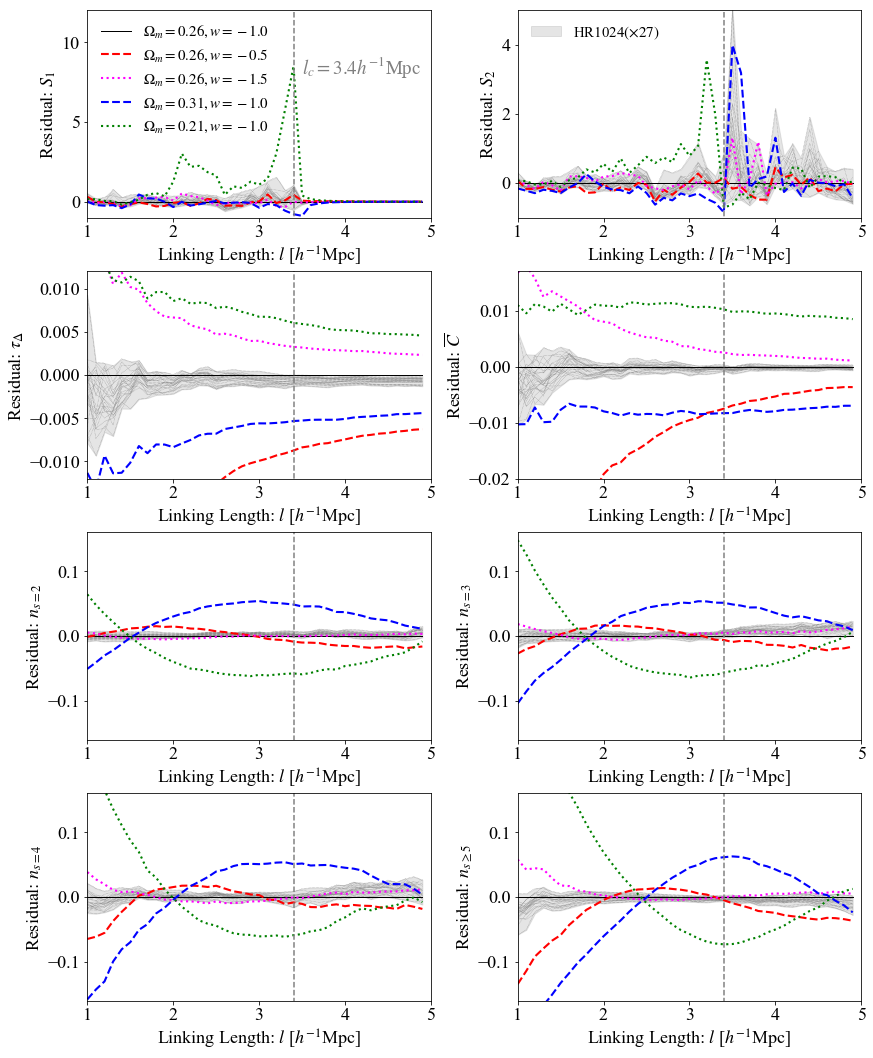

In [18]:
# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 18})
plt.rcParams['mathtext.fontset'] = 'stix'

lenmax = 5.0
lenmin = 1.0
vsys = np.double(512.0*512.0*512.0)

fig = plt.figure(figsize=(12,14.7))





plt.subplot(421)
plt.axis([lenmin,lenmax,-1.0,12])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Residual: $S_1$')
plt.xlabel(r'Linking Length: $l$ [$h^{-1}$Mpc]')

plt.fill_between(hrdfmin.index.values,hrdfmin.gcomp.values/rev.gcomp.values - 1.0,\
                 hrdfmax.gcomp.values/rev.gcomp.values - 1.0,color='grey',alpha=0.2)
for idx in imodel:
    plt.plot(hrdf[hrdf['imodel'] == idx].linklen.values,\
             hrdf[hrdf['imodel'] == idx].gcomp.values/rev.gcomp.values - 1.0,\
             linestyle = ':',linewidth=0.5,color='grey')
    
plt.plot(rev.linklen.values,np.zeros(len(rev.linklen.values)),color='k',linewidth=1.0,label=r'$\Omega_m=0.26,w=-1.0$')

plt.plot(rekk.linklen.values,rekk.gcomp.values/rev.gcomp.values - 1.0,linestyle = '--',linewidth=2.1,color='r',label=r'$\Omega_m=0.26,w=-0.5$')
plt.plot(rek.linklen.values,rek.gcomp.values/rev.gcomp.values - 1.0,linestyle = ':',linewidth=2.1,color='magenta',label=r'$\Omega_m=0.26,w=-1.5$')
plt.plot(remm.linklen.values,remm.gcomp.values/rev.gcomp.values - 1.0,linestyle = '--',linewidth=2.1,color='b',label=r'$\Omega_m=0.31,w=-1.0$')
plt.plot(rem.linklen.values,rem.gcomp.values/rev.gcomp.values - 1.0,linestyle = ':',linewidth=2.1,color='green',label=r'$\Omega_m=0.21,w=-1.0$')




plt.text(3.5,8,r'$l_c = 3.4 h^{-1}$Mpc',color='grey',fontsize=19)

plt.plot([3.4,3.4],[-100,100],color='grey',linewidth=1.5,linestyle='--')

plt.legend(loc=2,fontsize=15).get_frame().set_linewidth(0.0)

plt.subplot(422)
plt.axis([lenmin,lenmax,-1.0,5.0])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.xlabel(r'Linking Length: $l$ [$h^{-1}$Mpc]')
plt.ylabel(r'Residual: $S_2$')

plt.fill_between(hrdfmin.index.values,hrdfmin.scomp.values/rev.scomp.values - 1.0,\
                 hrdfmax.scomp.values/rev.scomp.values - 1.0,color='grey',alpha=0.2,label=r'HR1024$(\times 27)$')

for idx in imodel:
    plt.plot(hrdf[hrdf['imodel'] == idx].linklen.values,\
             hrdf[hrdf['imodel'] == idx].scomp.values/rev.scomp.values - 1.0,\
             linestyle = ':',linewidth=0.5,color='grey')
    
plt.plot(rev.linklen.values,np.zeros(len(rev.linklen.values)),color='k',linewidth=1)


plt.plot(rekk.linklen.values,rekk.scomp.values/rev.scomp.values - 1.0,linestyle = '--',linewidth=2.1,color='r')
plt.plot(rek.linklen.values,rek.scomp.values/rev.scomp.values - 1.0,linestyle = ':',linewidth=2.1,color='magenta')
plt.plot(remm.linklen.values,remm.scomp.values/rev.scomp.values - 1.0,linestyle = '--',linewidth=2.1,color='b')
plt.plot(rem.linklen.values,rem.scomp.values/rev.scomp.values - 1.0,linestyle = ':',linewidth=2.1,color='green')



plt.plot([3.4,3.4],[-100,100],color='grey',linewidth=1.5,linestyle='--')
plt.legend(loc=2,fontsize=15).get_frame().set_linewidth(0.0)

plt.subplot(423)
plt.axis([lenmin,lenmax,-0.012,0.012])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Residual: $\tau_\Delta$')
plt.xlabel(r'Linking Length: $l$ [$h^{-1}$Mpc]')

plt.fill_between(hrdfmin.index.values,hrdfmin.transitivity.values/rev.transitivity.values - 1.0,\
                 hrdfmax.transitivity.values/rev.transitivity.values - 1.0,color='grey',alpha=0.2)
for idx in imodel:
    plt.plot(hrdf[hrdf['imodel'] == idx].linklen.values,\
             hrdf[hrdf['imodel'] == idx].transitivity.values/rev.transitivity.values - 1.0,\
             linestyle = ':',linewidth=0.5,color='grey')




plt.plot(rev.linklen.values,np.zeros(len(rev.linklen.values)),color='k',linewidth=1)



plt.plot(rekk.linklen.values,rekk.transitivity.values/rev.transitivity.values - 1.0,linestyle = '--',linewidth=2.1,color='r')
plt.plot(rek.linklen.values,rek.transitivity.values/rev.transitivity.values - 1.0,linestyle = ':',linewidth=2.1,color='magenta')
plt.plot(remm.linklen.values,remm.transitivity.values/rev.transitivity.values - 1.0,linestyle = '--',linewidth=2.1,color='b')
plt.plot(rem.linklen.values,rem.transitivity.values/rev.transitivity.values - 1.0,linestyle = ':',linewidth=2.1,color='green')


plt.plot([3.4,3.4],[-100,100],color='grey',linewidth=1.5,linestyle='--')

plt.subplot(424)
plt.axis([lenmin,lenmax,-0.02,0.017])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Residual: $\overline{C}$')
plt.xlabel(r'Linking Length: $l$ [$h^{-1}$Mpc]')

plt.fill_between(hrdfmin.index.values,hrdfmin.avglcc.values/rev.avglcc.values - 1.0,\
                 hrdfmax.avglcc.values/rev.avglcc.values - 1.0,color='grey',alpha=0.2)

for idx in imodel:
    plt.plot(hrdf[hrdf['imodel'] == idx].linklen.values,\
             hrdf[hrdf['imodel'] == idx].avglcc.values/rev.avglcc.values - 1.0,\
             linestyle = ':',linewidth=0.5,color='grey')
    
plt.plot(rev.linklen.values,np.zeros(len(rev.linklen.values)),color='k',linewidth=1)

plt.plot(rekk.linklen.values,rekk.avglcc.values/rev.avglcc.values - 1.0,linestyle = '--',linewidth=2.1,color='r')
plt.plot(rek.linklen.values,rek.avglcc.values/rev.avglcc.values - 1.0,linestyle = ':',linewidth=2.1,color='magenta')
plt.plot(rem.linklen.values,rem.avglcc.values/rev.avglcc.values - 1.0,linestyle = ':',linewidth=2.1,color='green')
plt.plot(remm.linklen.values,remm.avglcc.values/rev.avglcc.values - 1.0,linestyle = '--',linewidth=2.1,color='b')





plt.plot([3.4,3.4],[-100,100],color='grey',linewidth=1.5,linestyle='--')

plt.subplot(425)
plt.axis([lenmin,lenmax,-0.16,0.16])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Residual: $n_{s=2}$')
plt.xlabel(r'Linking Length: $l$ [$h^{-1}$Mpc]')

plt.fill_between(hrdfmin.index.values,hrdfmin.n2comp.values/rev.n2comp.values - 1.0,\
                 hrdfmax.n2comp.values/rev.n2comp.values - 1.0,color='grey',alpha=0.2)

for idx in imodel:
    plt.plot(hrdf[hrdf['imodel'] == idx].linklen.values,\
             hrdf[hrdf['imodel'] == idx].n2comp.values/rev.n2comp.values - 1.0,\
             linestyle = ':',linewidth=0.5,color='grey')

plt.plot(rev.linklen.values,np.zeros(len(rev.linklen.values)),color='k',linewidth=1)

plt.plot(rekk.linklen.values,rekk.n2comp.values/rev.n2comp.values - 1.0,linestyle = '--',linewidth=2.1,color='r')
plt.plot(rek.linklen.values,rek.n2comp.values/rev.n2comp.values - 1.0,linestyle = ':',linewidth=2.1,color='magenta')
plt.plot(remm.linklen.values,remm.n2comp.values/rev.n2comp.values - 1.0,linestyle = '--',linewidth=2.1,color='b')
plt.plot(rem.linklen.values,rem.n2comp.values/rev.n2comp.values - 1.0,linestyle = ':',linewidth=2.1,color='green')





plt.plot([3.4,3.4],[-100,100],color='grey',linewidth=1.5,linestyle='--')



plt.subplot(426)
plt.axis([lenmin,lenmax,-0.16,0.16])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Residual: $n_{s=3}$')
plt.xlabel(r'Linking Length: $l$ [$h^{-1}$Mpc]')

plt.fill_between(hrdfmin.index.values,hrdfmin.n3comp.values/rev.n3comp.values - 1.0,\
                 hrdfmax.n3comp.values/rev.n3comp.values - 1.0,color='grey',alpha=0.2)

for idx in imodel:
    plt.plot(hrdf[hrdf['imodel'] == idx].linklen.values,\
             hrdf[hrdf['imodel'] == idx].n3comp.values/rev.n3comp.values - 1.0,\
             linestyle = ':',linewidth=0.5,color='grey')

plt.plot(rev.linklen.values,np.zeros(len(rev.linklen.values)),color='k',linewidth=1)


plt.plot(rekk.linklen.values,rekk.n3comp.values/rev.n3comp.values - 1.0,linestyle = '--',linewidth=2.1,color='r')
plt.plot(rek.linklen.values,rek.n3comp.values/rev.n3comp.values - 1.0,linestyle = ':',linewidth=2.1,color='magenta')
plt.plot(remm.linklen.values,remm.n3comp.values/rev.n3comp.values - 1.0,linestyle = '--',linewidth=2.1,color='b')
plt.plot(rem.linklen.values,rem.n3comp.values/rev.n3comp.values - 1.0,linestyle = ':',linewidth=2.1,color='green')





plt.plot([3.4,3.4],[-100,100],color='grey',linewidth=1.5,linestyle='--')

plt.subplot(427)
plt.axis([lenmin,lenmax,-0.16,0.16])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Residual: $n_{s=4}$')
plt.xlabel(r'Linking Length: $l$ [$h^{-1}$Mpc]')

plt.fill_between(hrdfmin.index.values,hrdfmin.n4comp.values/rev.n4comp.values - 1.0,\
                 hrdfmax.n4comp.values/rev.n4comp.values - 1.0,color='grey',alpha=0.2)

for idx in imodel:
    plt.plot(hrdf[hrdf['imodel'] == idx].linklen.values,\
             hrdf[hrdf['imodel'] == idx].n4comp.values/rev.n4comp.values - 1.0,\
             linestyle = ':',linewidth=0.5,color='grey')

plt.plot(rev.linklen.values,np.zeros(len(rev.linklen.values)),color='k',linewidth=1)


plt.plot(rekk.linklen.values,rekk.n4comp.values/rev.n4comp.values - 1.0,linestyle = '--',linewidth=2.1,color='r')
plt.plot(rek.linklen.values,rek.n4comp.values/rev.n4comp.values - 1.0,linestyle = ':',linewidth=2.1,color='magenta')
plt.plot(remm.linklen.values,remm.n4comp.values/rev.n4comp.values - 1.0,linestyle = '--',linewidth=2.1,color='b')
plt.plot(rem.linklen.values,rem.n4comp.values/rev.n4comp.values - 1.0,linestyle = ':',linewidth=2.1,color='green')





plt.plot([3.4,3.4],[-100,100],color='grey',linewidth=1.5,linestyle='--')

plt.subplot(428)
plt.axis([lenmin,lenmax,-0.16,0.16])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Residual: $n_{s\geq5}$')
plt.xlabel(r'Linking Length: $l$ [$h^{-1}$Mpc]')

plt.fill_between(hrdfmin.index.values,hrdfmin.n5cumcomp.values/rev.n5cumcomp.values - 1.0,\
                 hrdfmax.n5cumcomp.values/rev.n5cumcomp.values - 1.0,color='grey',alpha=0.2)
for idx in imodel:
    plt.plot(hrdf[hrdf['imodel'] == idx].linklen.values,\
             hrdf[hrdf['imodel'] == idx].n5cumcomp.values/rev.n5cumcomp.values - 1.0,\
             linestyle = ':',linewidth=0.5,color='grey')

plt.plot(rev.linklen.values,np.zeros(len(rev.linklen.values)),color='k',linewidth=1)


plt.plot(rekk.linklen.values,rekk.n5cumcomp.values/rev.n5cumcomp.values - 1.0,linestyle = '--',linewidth=2.1,color='r')
plt.plot(rek.linklen.values,rek.n5cumcomp.values/rev.n5cumcomp.values - 1.0,linestyle = ':',linewidth=2.1,color='magenta')
plt.plot(rem.linklen.values,rem.n5cumcomp.values/rev.n5cumcomp.values - 1.0,linestyle = ':',linewidth=2.1,color='green')
plt.plot(remm.linklen.values,remm.n5cumcomp.values/rev.n5cumcomp.values - 1.0,linestyle = '--',linewidth=2.1,color='b')



plt.plot([3.4,3.4],[-100,100],color='grey',linewidth=1.5,linestyle='--')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.0)
fig.savefig("graphResidualAbunTotalFinal.pdf")
fig.savefig("graphResidualAbunTotalFinal.eps")
fig.savefig("graphResidualAbunTotalFinal.png")

plt.show()



In [19]:
pwd

u'/Users/shong/databig/multiverse'

## Cosmic Variances vs. Graph Statistics 

> Using the HR4 data, we will measure the variances of three diagnostics, $\alpha$, $\tau_\Delta$, and $n_{s\ge5}$

### For 256 Mpc

In [20]:
imodel = range(0,27)
ifile = range(1,27)

hr2df = pickle.load(open("/Users/shong/databig/multiverse/hr4/newallstat256/256sub0.pickle", "rb" ))
hr2df['imodel'] = pd.Series(np.full(len(hrdf.index),imodel[0]))
for idx in ifile:
    filepath = "/Users/shong/databig/multiverse/hr4/newallstat256/256sub"+str(idx)+".pickle"
    tmpdf = pickle.load(open(filepath, "rb" ))
    tmpdf['imodel'] = pd.Series(np.full(len(tmpdf.index),idx))
    hr2df = hr2df.append(tmpdf, ignore_index=True)
hr2df.tail()

,ntot,gcomp,alpha,nvee,n3xtri,n2comp,n3comp,n4comp,n5compplus,imodel
1723,109875.0,2371.0,384860.0,880279.0,530124.0,3599.0,1812.0,971.0,3231.0,26
1724,113041.0,9929.0,412394.0,1008297.0,607131.0,3630.0,1812.0,926.0,3195.0,26
1725,109505.0,12001.0,387940.0,907656.0,545331.0,3541.0,1745.0,989.0,3163.0,26
1726,113447.0,11644.0,409516.0,977468.0,587400.0,3618.0,1728.0,997.0,3229.0,26
1727,120561.0,18120.0,458252.0,1167390.0,704616.0,3626.0,1719.0,989.0,3098.0,26


In [21]:
vsys2 = 256.0**3
hr2n5 = hr2df.n5compplus.values/vsys2
hr2tau = hr2df.n3xtri.values/hr2df.nvee.values
hr2alpha = hr2df.alpha.values/hr2df.ntot.values

In [22]:
hr2gcomp = hr2df.gcomp.values/hr2df.ntot.values

In [23]:
np.mean(hr2gcomp)

0.08748599087306248

In [24]:
[np.mean(hr2n5),np.std(hr2n5)]

[0.0001904340805830779, 3.803169362031472e-06]

In [25]:
[np.mean(hr2tau),np.std(hr2tau)]

[0.6035257147532825, 0.0016327429388521579]

In [26]:
[np.mean(hr2alpha),np.std(hr2alpha)]

[3.5900455563644162, 0.0812911556729806]

### For 362 Mpc

In [27]:
imodel = range(0,8)
ifile = range(1,8)

hr3df = pickle.load(open("/Users/shong/databig/multiverse/hr4/newallstat362/362sub0.pickle", "rb" ))
hr3df['imodel'] = pd.Series(np.full(len(hr3df.index),imodel[0]))
for idx in ifile:
    filepath = "/Users/shong/databig/multiverse/hr4/newallstat362/362sub"+str(idx)+".pickle"
    tmpdf = pickle.load(open(filepath, "rb" ))
    tmpdf['imodel'] = pd.Series(np.full(len(tmpdf.index),idx))
    hr3df = hr3df.append(tmpdf, ignore_index=True)
hr3df.tail()

,ntot,gcomp,alpha,nvee,n3xtri,n2comp,n3comp,n4comp,n5compplus,imodel
507,311730.0,63882.0,1126776.0,2713191.0,1635165.0,10136.0,4665.0,2750.0,8634.0,7
508,307037.0,13212.0,1099224.0,2629083.0,1584678.0,9997.0,4792.0,2663.0,8689.0,7
509,307503.0,10349.0,1088030.0,2556041.0,1539918.0,10188.0,4898.0,2680.0,8869.0,7
510,317599.0,26192.0,1162460.0,2834525.0,1706067.0,9959.0,4881.0,2722.0,8633.0,7
511,312610.0,23925.0,1123016.0,2690963.0,1621476.0,9886.0,4787.0,2856.0,9088.0,7


In [28]:
vsys3 = 362.0**3
hr3n5 = hr3df.n5compplus.values/vsys3
hr3tau = hr3df.n3xtri.values/hr3df.nvee.values
hr3alpha = hr3df.alpha.values/hr3df.ntot.values
hr3gcomp = hr3df.gcomp.values/hr3df.ntot.values

### For 724 Mpc

In [29]:
imodel = range(0,8)
ifile = range(1,8)

hr7df = pickle.load(open("/Users/shong/databig/multiverse/hr4/newallstat724/724sub0.pickle", "rb" ))
hr7df['imodel'] = pd.Series(np.full(len(hr7df.index),imodel[0]))
for idx in ifile:
    filepath = "/Users/shong/databig/multiverse/hr4/newallstat724/724sub"+str(idx)+".pickle"
    tmpdf = pickle.load(open(filepath, "rb" ))
    tmpdf['imodel'] = pd.Series(np.full(len(tmpdf.index),idx))
    hr7df = hr7df.append(tmpdf, ignore_index=True)
hr7df.tail()

,ntot,gcomp,alpha,nvee,n3xtri,n2comp,n3comp,n4comp,n5compplus,imodel
59,2507861.0,89579.0,9111200.0,22054943.0,13287249.0,79822.0,38151.0,21734.0,69770.0,7
60,2504205.0,172345.0,9079298.0,21918391.0,13197156.0,79544.0,38022.0,21818.0,69648.0,7
61,2485728.0,132079.0,8930182.0,21319027.0,12844983.0,80409.0,38168.0,21908.0,70572.0,7
62,2466383.0,32843.0,8834500.0,21041823.0,12679353.0,79844.0,38089.0,21607.0,69507.0,7
63,2501842.0,144912.0,9077928.0,21992072.0,13239801.0,79934.0,37861.0,21850.0,69806.0,7


In [30]:
vsys7 = 724.0**3
hr7n5 = hr7df.n5compplus.values/vsys7
hr7tau = hr7df.n3xtri.values/hr7df.nvee.values
hr7alpha = hr7df.alpha.values/hr7df.ntot.values
hr7gcomp = hr7df.gcomp.values/hr7df.ntot.values

In [110]:
len(hr7n5)

64

### For 512 Mpc 

In [31]:
imodel = range(0,27)
ifile = range(1,27)

hr5df = pickle.load(open("/Users/shong/databig/multiverse/hr4/newallstat512/512sub0.pickle", "rb" ))
hr5df['imodel'] = pd.Series(np.full(len(hrdf.index),imodel[0]))
for idx in ifile:
    filepath = "/Users/shong/databig/multiverse/hr4/newallstat512/512sub"+str(idx)+".pickle"
    tmpdf = pickle.load(open(filepath, "rb" ))
    tmpdf['imodel'] = pd.Series(np.full(len(tmpdf.index),idx))
    hr5df = hr5df.append(tmpdf, ignore_index=True)
hr5df.head()

,ntot,gcomp,alpha,nvee,n3xtri,n2comp,n3comp,n4comp,n5compplus,imodel
0,891082.0,38402.0,3225842.0,7785498.0,4686813.0,28543.0,13465.0,7963.0,25042.0,0
1,908104.0,151873.0,3340658.0,8209725.0,4938987.0,28252.0,13755.0,7755.0,24803.0,0
2,870279.0,18477.0,3099200.0,7368432.0,4444329.0,28706.0,13491.0,7971.0,25207.0,0
3,878560.0,91889.0,3170662.0,7625306.0,4600761.0,28300.0,13422.0,7692.0,24920.0,0
4,878378.0,15559.0,3150706.0,7507722.0,4526469.0,28189.0,13610.0,7751.0,25145.0,0


#### Testing the new `spark 2.3.2` with `graphframes 0.6` 

> I have upgraded my `spark 2.1.1` to `spark 2.3.2`. Accordingly, the graphframes is upgraded to `graphframes 0.6`. The new file `newallstats512/512sub0.picle` is from this new setting. 

> The main upgrade from `2.1` is (1) builtin `pyarrow`; hence, no more serialization and deserialization! Commands like `toPandas()` will be very fast, (2) the support of `Kubernates`, and (3) vectorized UDF, i.e., very fast `python-udf` 

>The new command for enabling this `arrow` is :
```
    spark = SparkSession.builder.appName("largeScaleGstat")\
    .config("spark.driver.maxResultSize","8g")\
    .config("spark.sql.execution.arrow.enabled","true")\
    .config("spark.executor.memoryOverhead","42GB")\
    .getOrCreate()
```

In [32]:
new512df = pickle.load(open("/Users/shong/databig/multiverse/hr4/allstats512/512sub0.pickle", "rb" ))
new512df.head()

,ntot,alpha,nvee,n3xtri,n2comp,n3comp,n4comp,n5compplus
0,891082.0,3225842.0,7785498.0,4686813.0,28543.0,13465.0,7963.0,25042.0
1,908104.0,3340658.0,8209725.0,4938987.0,28252.0,13755.0,7755.0,24803.0
2,870279.0,3099200.0,7368432.0,4444329.0,28706.0,13491.0,7971.0,25207.0
3,878560.0,3170662.0,7625306.0,4600761.0,28300.0,13422.0,7692.0,24920.0
4,878378.0,3150706.0,7507722.0,4526469.0,28189.0,13610.0,7751.0,25145.0


#### The same result! End of the test! 

In [33]:
vsys5 = 512.0**3

In [34]:
hr5n5 = hr5df.n5compplus.values/vsys5
hr5tau = hr5df.n3xtri.values/hr5df.nvee.values
hr5alpha = hr5df.alpha.values/hr5df.ntot.values
hr5gcomp = hr5df.gcomp.values/hr5df.ntot.values

In [35]:
print 8*27

216


In [36]:
[np.mean(hr5n5),np.std(hr5n5)]

[0.00018559948161796287, 1.3005290521575464e-06]

In [37]:
[np.mean(hr5tau),np.std(hr5tau)]

[0.6024118056044345, 0.0005953935816321744]

In [38]:
[np.mean(hr5alpha),np.std(hr5alpha)]

[3.6166071449604598, 0.02912718546168987]

### For 1024 

In [39]:
hrdf = pickle.load(open("/Users/shong/databig/multiverse/hr4/sub-stat-new.pickle", "rb" ))

In [40]:
vsys = 1024.0**3

In [41]:
hrdf.head()

,ntot,gcomp,alpha,nvee,n3xtri,n2comp,n3comp,n4comp,n5compplus
0,7066106.0,252464.0,25563376.0,61528755.0,37033161.0,225719.0,107744.0,62231.0,197008.0
1,7077618.0,223838.0,25616772.0,61567193.0,37029354.0,226499.0,106901.0,61582.0,195926.0
2,7085733.0,223096.0,25734038.0,62174797.0,37403964.0,226074.0,107115.0,61163.0,196255.0
3,7114993.0,292338.0,25879828.0,62659728.0,37698159.0,225835.0,107832.0,61246.0,196298.0
4,7063766.0,337623.0,25625406.0,61986650.0,37319628.0,225690.0,106654.0,61936.0,196317.0


In [42]:
hrn5 = hrdf.n5compplus.values/vsys
hrtau = hrdf.n3xtri.values/hrdf.nvee.values
hralpha = hrdf.alpha.values/hrdf.ntot.values
hrgcomp = hrdf.gcomp.values/hrdf.ntot.values

In [43]:
[np.mean(hrn5),np.std(hrn5)]

[0.0001831758008510978, 4.5312047842657126e-07]

In [44]:
[np.mean(hrtau),np.std(hrtau)]

[0.6018594526873623, 0.00022717571874776872]

In [45]:
[np.mean(hralpha),np.std(hralpha)]

[3.629244311071335, 0.008566650494077215]

### For 2048

In [46]:
alphabig = 205927982.0/56672770.0
taubig = 299540046.0/497955973.0
n5plusbig = 1561692.0/(2048.0**3.0)
alphabig, taubig,n5plusbig

(3.6336318482403454, 0.6015392168014019, 0.00018180487677454948)

### $\sigma \propto \frac{1}{\sqrt{V}}$

In [47]:
salpha = (np.log10(np.std(hr5alpha)) - np.log10(np.std(hr2alpha)))/(np.log10(vsys5) - np.log10(vsys2))
stau = (np.log10(np.std(hr5tau)) - np.log10(np.std(hr2tau)))/(np.log10(vsys5) - np.log10(vsys2))
sn5 = (np.log10(np.std(hr5n5)) - np.log10(np.std(hr2n5)))/(np.log10(vsys5) - np.log10(vsys2))
print [salpha,stau,sn5]

[-0.49357736554345644, -0.4851273648522193, -0.5160345195405288]


In [48]:
xm = 2**np.double(range(8,13))

In [49]:
xm

array([ 256.,  512., 1024., 2048., 4096.])

In [50]:
am = np.std(hr2alpha)
ym = am * (xm/256.0)**(-1.5)

In [111]:
len(hr3n5)

512

In [112]:
len(hr7n5)

64

### plot the final results 

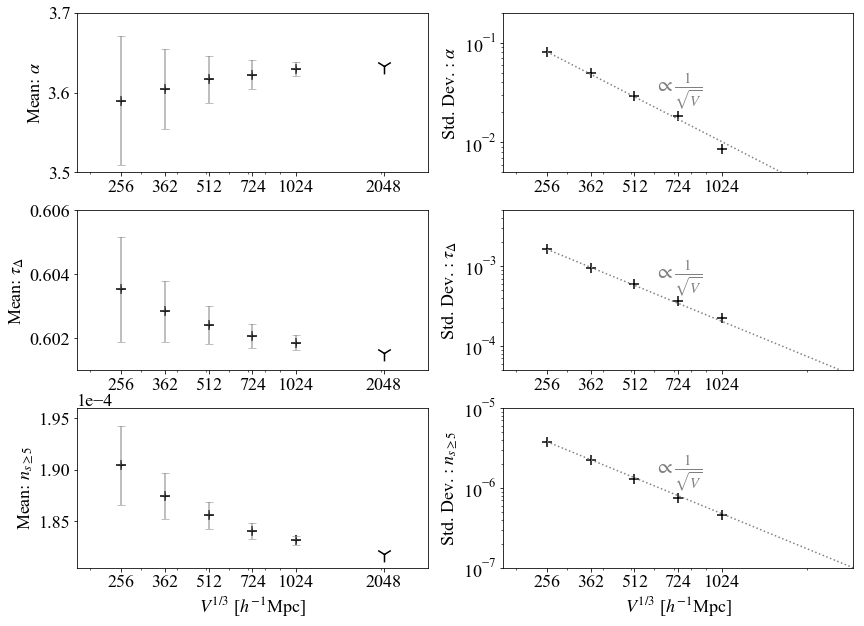

In [51]:
# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 18})
plt.rcParams['mathtext.fontset'] = 'stix'

lenmax = 2**(11.5)
lenmin = 2**(7.5)
vsys = np.double(512.0*512.0*512.0)

fig = plt.figure(figsize=(12,8.7))

xvol = [256,362,512,724,1024,2048]
xxvol = [256,362,512,724,1024]




plt.subplot(321)
plt.axis([lenmin,lenmax,3.5,3.7])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
#plt.yscale('log')
plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Mean: $\alpha$')
#plt.xlabel(r'$V^{1/3}$ [$h^{-1}$Mpc]')

plt.xticks(xvol,xvol)

plt.errorbar(xxvol,[np.mean(hr2alpha),np.mean(hr3alpha),np.mean(hr5alpha),np.mean(hr7alpha),np.mean(hralpha)],\
             yerr=[np.std(hr2alpha),np.std(hr3alpha),np.std(hr5alpha),np.std(hr7alpha),np.std(hralpha)],\
             fmt='+k', ecolor='grey', capsize=4,elinewidth = 2,alpha=0.5)
plt.scatter(xxvol,[np.mean(hr2alpha),np.mean(hr3alpha),np.mean(hr5alpha),np.mean(hr7alpha),np.mean(hralpha)],\
            s=100,marker="+", color='black',label='STD')

plt.scatter([2048.0],[alphabig],\
            s=250,marker="1", color='black',label='STD')




plt.subplot(322)
plt.axis([lenmin,lenmax,0.005,0.2])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
plt.yscale('log')
plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Std. Dev. : $\alpha$')
#plt.xlabel(r'$V^{1/3}$ [$h^{-1}$Mpc]')

plt.xticks(xxvol,xxvol)

am = np.std(hr2alpha)
ym = am * (xm/256.0)**(-1.5)
plt.plot(xm,ym,linestyle = ':',color='grey')

plt.scatter(xxvol,[np.std(hr2alpha),np.std(hr3alpha),np.std(hr5alpha),np.std(hr7alpha),np.std(hralpha)],\
            s=100,marker="+", color='black',label='STD')

#plt.text(600,0.08,r'$\propto \frac{1}{\sqrt{V}} \equiv (V^{1/3})^{-1.5}$',color='grey',fontsize=21)
#plt.text(600,0.08,r'$\propto (V^{1/3})^{-1.5} \equiv \frac{1}{\sqrt{V}} $',color='grey',fontsize=21)
plt.text(600,0.032,r'$\propto \frac{1}{\sqrt{V}}$',color='grey',fontsize=21)




plt.subplot(323)
plt.axis([lenmin,lenmax,0.601,0.606])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
#plt.yscale('log')
plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Mean: $\tau_\Delta$')
#plt.xlabel(r'$V^{1/3}$ [$h^{-1}$Mpc]')

plt.xticks(xvol,xvol)

plt.errorbar(xxvol,[np.mean(hr2tau),np.mean(hr3tau),np.mean(hr5tau),np.mean(hr7tau),np.mean(hrtau)],\
             yerr=[np.std(hr2tau),np.std(hr3tau),np.std(hr5tau),np.std(hr7tau),np.std(hrtau)],\
             fmt='+k', ecolor='grey', capsize=4,elinewidth = 2,alpha=0.5)

plt.scatter(xxvol,[np.mean(hr2tau),np.mean(hr3tau),np.mean(hr5tau),np.mean(hr7tau),np.mean(hrtau)],\
            s=100,marker="+", color='black',label='STD')

plt.scatter([2048.0],[taubig],\
            s=250,marker="1", color='black',label='STD')



plt.subplot(324)
plt.axis([lenmin,lenmax,0.00005,0.005])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
plt.yscale('log')
plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Std. Dev. : $\tau_\Delta$')
#plt.xlabel(r'$V^{1/3}$ [$h^{-1}$Mpc]')

plt.xticks(xxvol,xxvol)

am = np.std(hr2tau)
ym = am * (xm/256.0)**(-1.5)
plt.plot(xm,ym,linestyle = ':',color='grey')

plt.scatter(xxvol,[np.std(hr2tau),np.std(hr3tau),np.std(hr5tau),np.std(hr7tau),np.std(hrtau)],
            s=100,marker="+", color='black',label='STD')


plt.text(600,0.00069,r'$\propto \frac{1}{\sqrt{V}}$',color='grey',fontsize=21)




plt.subplot(325)
plt.axis([lenmin,lenmax,0.0001805,0.000196])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
#plt.yscale('log')
plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Mean: $n_{s\geq 5}$')
plt.xlabel(r'$V^{1/3}$ [$h^{-1}$Mpc]')

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xticks(xvol,xvol)

plt.errorbar(xxvol,[np.mean(hr2n5),np.mean(hr3n5),np.mean(hr5n5),np.mean(hr7n5),np.mean(hrn5)],\
             yerr=[np.std(hr2n5),np.std(hr3n5),np.std(hr5n5),np.std(hr7n5),np.std(hrn5)],\
             fmt='+k', ecolor='grey', capsize=4,elinewidth = 2,alpha=0.5)

plt.scatter(xxvol,[np.mean(hr2n5),np.mean(hr3n5),np.mean(hr5n5),np.mean(hr7n5),np.mean(hrn5)],\
            s=100,marker="+", color='black',label='STD')

plt.scatter([2048.0],[n5plusbig],\
            s=250,marker="1", color='black',label='STD')

#plt.plot(xvol,func(np.float32(xvol),1.92420186e-04, 1.20103999e+02, 4.40957815e+00))



plt.subplot(326)
plt.axis([lenmin,lenmax,1e-7,1e-5])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
plt.yscale('log')
plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Std. Dev. : $n_{s\geq 5}$')
plt.xlabel(r'$V^{1/3}$ [$h^{-1}$Mpc]')

plt.xticks(xxvol,xxvol)

am = np.std(hr2n5)
ym = am * (xm/256.0)**(-1.5)
plt.plot(xm,ym,linestyle = ':',color='grey')

plt.scatter(xxvol,[np.std(hr2n5),np.std(hr3n5),np.std(hr5n5),np.std(hr7n5),np.std(hrn5)],\
            s=100,marker="+", color='black',label='STD')


plt.text(600,1.5e-6,r'$\propto \frac{1}{\sqrt{V}}$',color='grey',fontsize=21)






plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.0)
fig.savefig("hrvariance-new.pdf")
fig.savefig("hrvariance-new.eps")
fig.savefig("hrvariance-new.png")

plt.show()



In [52]:
[np.mean(hr2gcomp),np.mean(hr3gcomp),np.mean(hr5gcomp),np.mean(hr7gcomp)]

[0.08748599087306248,
 0.07133077427846314,
 0.05613166150642969,
 0.04466872885790105]

## Solve the equation for the finite size scaling

> $n_{s\ge5}(L) = n_{s\ge5}(L = \infty) + A L^{-1/\nu} $ 

> $y = B + A x^{-\alpha}$, for given (x,y), solve A,B,$\alpha$ 

In [53]:
from scipy.optimize import curve_fit

In [54]:
def func(x,B,A,alpha):
    return B + A * x**(-1.0*alpha)

In [55]:
def funcmin(x,B,A):
    return B + A * x**(-1.5)

In [56]:
ydata = [np.mean(hr2n5),np.mean(hr3n5),np.mean(hr5n5),np.mean(hr7n5),np.mean(hrn5)]
#ydata = [np.mean(hr2n5),np.mean(hr3n5),np.mean(hr5n5),np.mean(hr7n5)]

In [57]:
xdata = [256.0, 362.0, 512.0, 724.0, 1024.0]
#xdata = [256.0, 362.0, 512.0, 724.0]

In [58]:
popt, pcov = curve_fit(funcmin, xdata, ydata, bounds=(0,[0.0001831758008510978,1e3]))

In [59]:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0,[0.00251758008510978,1e5,10.0]))

In [60]:
popt

array([2.57834838e-04, 2.71086502e+04, 7.28926374e+00])

In [61]:
pcov

array([[3.21568880e-09, 0.00000000e+00, 6.44313915e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.44313915e+03, 0.00000000e+00, 6.45492223e+16]])

In [62]:
print funcmin(2048.0,1.37826374e-04,4.09268374e-01)

0.000142242213273


In [63]:
print func(2048.0,1.90351224e-04, 2.51937461e+02, 7.48062605e+00)

0.000190351224


In [64]:
print func(np.float32(xxvol),3.15781492e-02, 2.52003437e+07, 7.48020014e+00)

[0.03157815 0.03157815 0.03157815 0.03157815 0.03157815]


In [65]:
print func(np.float32(xxvol),n5plusbig, 2.52003437e+07, 7.48020014e+00)

[0.0001818 0.0001818 0.0001818 0.0001818 0.0001818]


## The finite size scalings for Percolation Threshold

> $|S_{1}(L) - S_{1}(L = \infty)| = A L^{-1/\nu} $ 

> $y =  A x^{-\alpha}$

In [66]:
def funcx(x,A,alpha):
    return A * x**(-1.0*alpha)

In [67]:
xdata = [256.0, 362.0, 512.0, 724.0, 1024.0]

In [68]:
ydata = [np.mean(hr2gcomp),np.mean(hr3gcomp),np.mean(hr5gcomp),np.mean(hr7gcomp),np.mean(hrgcomp)]

In [69]:
popt, pcov = curve_fit(funcx, xdata, ydata, bounds=(0,[1e5,10.0]))

In [70]:
popt

array([3.13403798, 0.64435787])

In [71]:
pcov

array([[0.04216308, 0.0022481 ],
       [0.0022481 , 0.0001205 ]])

## Solve the equation for the finite size scaling

> $n_{s\ge5}(L) = \epsilon \big(\frac{x}{x_0}\big)^{-\alpha} + ( B_0 - \epsilon ) $ 

In [72]:
n5plusbig

0.00018180487677454948

In [73]:
ydata

[0.08748599087306248,
 0.07133077427846314,
 0.05613166150642969,
 0.04466872885790105,
 0.03598447130978254]

In [74]:
def funcp(x,eps,alpha):
    return eps * (x/2048.0)**(-1.0*alpha) + 0.00018180487677454948 - eps

In [75]:
funcp(2048.0,0.000001,3.0)

0.00018180487677454948

In [76]:
xm

array([ 256.,  512., 1024., 2048., 4096.])

In [77]:
xmm = np.double(np.arange(60,120)/10.0)

In [78]:
xmm = 2**(xmm)

In [79]:
xmm

array([  64.        ,   68.5935016 ,   73.51669472,   78.79324245,
         84.44850629,   90.50966799,   97.00586026,  103.96830673,
        111.4304721 ,  119.42822292,  128.        ,  137.1870032 ,
        147.03338944,  157.58648491,  168.89701258,  181.01933598,
        194.01172051,  207.93661347,  222.8609442 ,  238.85644583,
        256.        ,  274.37400641,  294.06677888,  315.17296982,
        337.79402516,  362.03867197,  388.02344103,  415.87322693,
        445.72188841,  477.71289167,  512.        ,  548.74801282,
        588.13355776,  630.34593963,  675.58805032,  724.07734394,
        776.04688205,  831.74645387,  891.44377682,  955.42578333,
       1024.        , 1097.49602564, 1176.26711552, 1260.69187927,
       1351.17610063, 1448.15468787, 1552.09376411, 1663.49290774,
       1782.88755363, 1910.85156667, 2048.        , 2194.99205127,
       2352.53423103, 2521.38375853, 2702.35220126, 2896.30937574,
       3104.18752821, 3326.98581548, 3565.77510726, 3821.70313

In [80]:
[np.mean(hr2n5),np.mean(hr3n5),np.mean(hr5n5),np.mean(hr7n5),np.mean(hrn5),n5plusbig]

[0.0001904340805830779,
 0.00018748155122047067,
 0.00018559948161796287,
 0.00018407072066364282,
 0.0001831758008510978,
 0.00018180487677454948]

In [81]:
print np.mean(hr2n5)-n5plusbig

8.629203808528419e-06


In [82]:
xvol

[256, 362, 512, 724, 1024, 2048]

In [83]:
popt, pcov = curve_fit(funcp, xvol,\
                       [np.mean(hr2n5),np.mean(hr3n5),np.mean(hr5n5),np.mean(hr7n5),np.mean(hrn5),n5plusbig])

In [84]:
popt

array([1.33408415e-06, 9.65052009e-01])

In [85]:
pcov

array([[ 7.50290850e-15, -2.49277405e-09],
       [-2.49277405e-09,  8.37455153e-04]])

In [86]:
print 0.00018180487677454948 - 1.33408415e-06

0.000180470792625


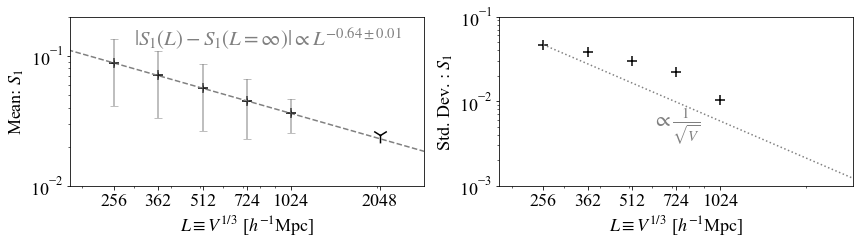

In [87]:
# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 18})
plt.rcParams['mathtext.fontset'] = 'stix'

lenmax = 2**(11.5)
lenmin = 2**(7.5)
vsys = np.double(512.0*512.0*512.0)

fig = plt.figure(figsize=(12,3.4))

xvol = [256,362,512,724,1024,2048]
xxvol = [256,362,512,724,1024]




plt.subplot(121)
plt.axis([lenmin,lenmax,1e-2,0.2])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
plt.yscale('log')
plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Mean: $S_1$')
plt.xlabel(r'$L \equiv V^{1/3}$ [$h^{-1}$Mpc]')

#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xticks(xvol,xvol)

plt.errorbar([256,362,512,724,1024],[np.mean(hr2gcomp),np.mean(hr3gcomp),\
                                     np.mean(hr5gcomp),np.mean(hr7gcomp),np.mean(hrgcomp)],\
             yerr=[np.std(hr2gcomp),np.std(hr3gcomp),np.std(hr5gcomp),np.std(hr7gcomp),np.std(hrgcomp)],\
             fmt='+k', ecolor='grey', capsize=4,elinewidth = 2,alpha=0.5)

plt.scatter([256,362,512,724,1024],[np.mean(hr2gcomp),np.mean(hr3gcomp),np.mean(hr5gcomp),\
                                    np.mean(hr7gcomp),np.mean(hrgcomp)],\
            s=100,marker="+", color='black',label='STD')

plt.scatter([2048.0],[0.0245893927542],\
            s=250,marker="1", color='black',label='STD')

plt.plot(xmm,funcx(np.float32(xmm),3.13403798, 0.64435787),linestyle = '--',color='grey')

plt.text(300,1.2e-1,r'$|S_{1}(L) - S_{1}(L=\infty)|\propto L^{-0.64 \pm 0.01} $',color='grey',fontsize=21)






plt.subplot(122)
plt.axis([lenmin,lenmax,1e-3,1e-1])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
plt.yscale('log')
plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Std. Dev. : $S_1$')
plt.xlabel(r'$L \equiv V^{1/3}$ [$h^{-1}$Mpc]')

plt.xticks(xxvol,xxvol)

am = np.std(hr2gcomp)
ym = am * (xm/256.0)**(-1.5)
plt.plot(xm,ym,linestyle = ':',color='grey')

plt.scatter([256,362,512,724,1024],[np.std(hr2gcomp),np.std(hr3gcomp),np.std(hr5gcomp),\
                                    np.std(hr7gcomp),np.std(hrgcomp)],\
            s=100,marker="+", color='black',label='STD')


plt.text(600,0.5e-2,r'$\propto \frac{1}{\sqrt{V}}$',color='grey',fontsize=21)





plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.0)
fig.savefig("hrvariance-fit.pdf")
fig.savefig("hrvariance-fit.eps")
fig.savefig("hrvariance-fit.png")

plt.show()



In [88]:
print 1393549.0/56672770.0

0.0245893927542


In [89]:
np.sqrt(np.diag(pcov))

array([8.66193310e-08, 2.89388174e-02])

In [90]:
print 0.64 * 1.0/3.0

0.213333333333


In [91]:
print 0.01/(0.64*0.64)

0.0244140625


In [92]:
print 1.0/(3.0*0.64)

0.520833333333


In [93]:
print 0.644/3.0

0.214666666667


In [94]:
print 0.01097743/3.0

0.00365914333333


## Solve the equation for the finite size scaling

> $\tau_{\Delta}(L) = \epsilon \big(\frac{x}{x_0}\big)^{-\alpha} + ( B_0 - \epsilon ) $ 

In [95]:
def funct(x,eps,alpha):
    return eps * (x/2048.0)**(-1.0*alpha) + 0.6015392168014019 - eps

In [96]:
xvol

[256, 362, 512, 724, 1024, 2048]

In [97]:
[np.mean(hr2tau),np.mean(hr3tau),np.mean(hr5tau),np.mean(hr7tau),np.mean(hrtau),taubig]

[0.6035257147532825,
 0.602842737956184,
 0.6024118056044345,
 0.602067033608162,
 0.6018594526873623,
 0.6015392168014019]

In [98]:
popt, pcov = curve_fit(funct, xvol,\
                       [np.mean(hr2tau),np.mean(hr3tau),np.mean(hr5tau),np.mean(hr7tau),np.mean(hrtau),taubig])

In [99]:
popt

array([3.11407168e-04, 9.58802414e-01])

In [100]:
pcov

array([[ 5.01821414e-10, -7.12848962e-07],
       [-7.12848962e-07,  1.02389060e-03]])

In [101]:
print 0.6015392168014019 - 3.11407168e-04

0.601227809633


## Solve the equation for the finite size scaling

> $\alpha(L) = \epsilon \big(\frac{x}{x_0}\big)^{-\alpha} + ( B_0 - \epsilon ) $ 

In [102]:
def funca(x,eps,alpha):
    return eps * (x/2048.0)**(-1.0*alpha) + 3.6336318482403454 - eps

In [103]:
[np.mean(hr2alpha),np.mean(hr3alpha),np.mean(hr5alpha),np.mean(hr7alpha),np.mean(hralpha),alphabig]

[3.5900455563644162,
 3.604582916936277,
 3.6166071449604598,
 3.622692376933794,
 3.629244311071335,
 3.6336318482403454]

In [104]:
popt, pcov = curve_fit(funca, xvol,\
                       [np.mean(hr2alpha),np.mean(hr3alpha),np.mean(hr5alpha),\
                        np.mean(hr7alpha),np.mean(hralpha),alphabig])

In [105]:
popt

array([-0.00464034,  1.12910386])

In [106]:
pcov

array([[3.89597855e-07, 3.87926315e-05],
       [3.87926315e-05, 3.90867514e-03]])

In [107]:
print 3.6336318482403454 + 0.00464034

3.63827218824


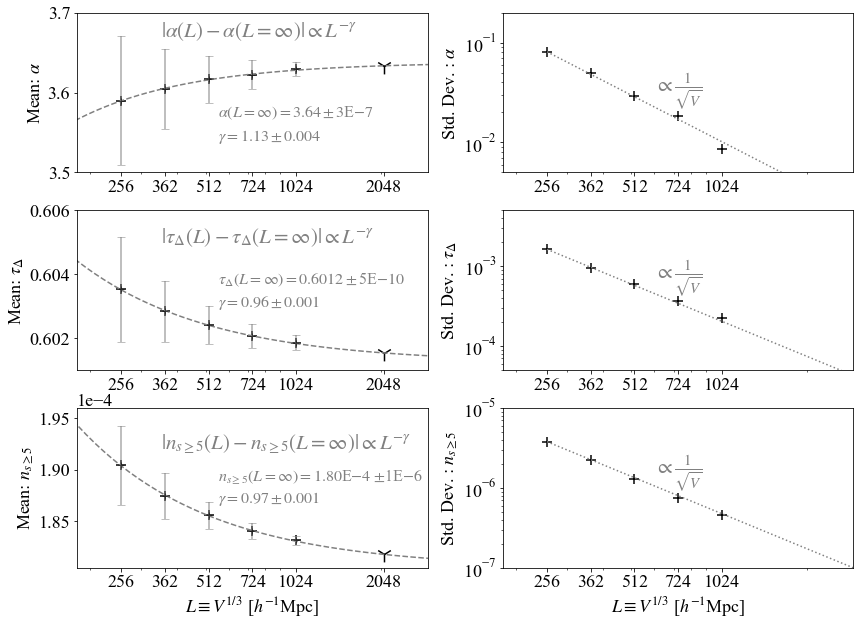

In [108]:
# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 18})
plt.rcParams['mathtext.fontset'] = 'stix'

lenmax = 2**(11.5)
lenmin = 2**(7.5)
vsys = np.double(512.0*512.0*512.0)

fig = plt.figure(figsize=(12,8.7))

xvol = [256,362,512,724,1024,2048]
xxvol = [256,362,512,724,1024]




plt.subplot(321)
plt.axis([lenmin,lenmax,3.5,3.7])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
#plt.yscale('log')
plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Mean: $\alpha$')
#plt.xlabel(r'$V^{1/3}$ [$h^{-1}$Mpc]')

plt.xticks(xvol,xvol)

plt.plot(xmm,funca(xmm,-0.00464034,  1.12910386),linestyle = '--',color='grey')

plt.errorbar(xxvol,[np.mean(hr2alpha),np.mean(hr3alpha),np.mean(hr5alpha),np.mean(hr7alpha),np.mean(hralpha)],\
             yerr=[np.std(hr2alpha),np.std(hr3alpha),np.std(hr5alpha),np.std(hr7alpha),np.std(hralpha)],\
             fmt='+k', ecolor='grey', capsize=4,elinewidth = 2,alpha=0.5)
plt.scatter(xxvol,[np.mean(hr2alpha),np.mean(hr3alpha),np.mean(hr5alpha),np.mean(hr7alpha),np.mean(hralpha)],\
            s=100,marker="+", color='black',label='STD')

plt.scatter([2048.0],[alphabig],\
            s=250,marker="1", color='black',label='STD')



plt.text(350,3.67,r'$| \alpha(L) - \alpha(L=\infty) | \propto L^{-\gamma} $',color='grey',fontsize=21)

plt.text(550,3.57,r'$\alpha(L=\infty) = 3.64 \pm 3$E$-7$',color='grey',fontsize=16)
plt.text(550,3.54,r'$\gamma = 1.13 \pm 0.004$',color='grey',fontsize=16)





plt.subplot(322)
plt.axis([lenmin,lenmax,0.005,0.2])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
plt.yscale('log')
plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Std. Dev. : $\alpha$')
#plt.xlabel(r'$V^{1/3}$ [$h^{-1}$Mpc]')

plt.xticks(xxvol,xxvol)

am = np.std(hr2alpha)
ym = am * (xm/256.0)**(-1.5)
plt.plot(xm,ym,linestyle = ':',color='grey')

plt.scatter(xxvol,[np.std(hr2alpha),np.std(hr3alpha),np.std(hr5alpha),np.std(hr7alpha),np.std(hralpha)],\
            s=100,marker="+", color='black',label='STD')

#plt.text(600,0.08,r'$\propto \frac{1}{\sqrt{V}} \equiv (V^{1/3})^{-1.5}$',color='grey',fontsize=21)
#plt.text(600,0.08,r'$\propto (V^{1/3})^{-1.5} \equiv \frac{1}{\sqrt{V}} $',color='grey',fontsize=21)
plt.text(600,0.032,r'$\propto \frac{1}{\sqrt{V}}$',color='grey',fontsize=21)




plt.subplot(323)
plt.axis([lenmin,lenmax,0.601,0.606])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
#plt.yscale('log')
plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Mean: $\tau_\Delta$')
#plt.xlabel(r'$V^{1/3}$ [$h^{-1}$Mpc]')

plt.xticks(xvol,xvol)

plt.plot(xmm,funct(xmm,3.11407168e-04, 9.58802414e-01),linestyle = '--',color='grey')

plt.errorbar(xxvol,[np.mean(hr2tau),np.mean(hr3tau),np.mean(hr5tau),np.mean(hr7tau),np.mean(hrtau)],\
             yerr=[np.std(hr2tau),np.std(hr3tau),np.std(hr5tau),np.std(hr7tau),np.std(hrtau)],\
             fmt='+k', ecolor='grey', capsize=4,elinewidth = 2,alpha=0.5)

plt.scatter(xxvol,[np.mean(hr2tau),np.mean(hr3tau),np.mean(hr5tau),np.mean(hr7tau),np.mean(hrtau)],\
            s=100,marker="+", color='black',label='STD')

plt.scatter([2048.0],[taubig],\
            s=250,marker="1", color='black',label='STD')




plt.text(350,0.605,r'$| \tau_{\Delta}(L) - \tau_{\Delta}(L=\infty) | \propto L^{-\gamma} $',color='grey',fontsize=21)

plt.text(550,0.6037,r'$\tau_\Delta(L=\infty) = 0.6012 \pm $5E$-10$',color='grey',fontsize=16)
plt.text(550,0.603,r'$\gamma = 0.96 \pm 0.001$',color='grey',fontsize=16)





plt.subplot(324)
plt.axis([lenmin,lenmax,0.00005,0.005])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
plt.yscale('log')
plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Std. Dev. : $\tau_\Delta$')
#plt.xlabel(r'$V^{1/3}$ [$h^{-1}$Mpc]')

plt.xticks(xxvol,xxvol)

am = np.std(hr2tau)
ym = am * (xm/256.0)**(-1.5)
plt.plot(xm,ym,linestyle = ':',color='grey')

plt.scatter(xxvol,[np.std(hr2tau),np.std(hr3tau),np.std(hr5tau),np.std(hr7tau),np.std(hrtau)],
            s=100,marker="+", color='black',label='STD')


plt.text(600,0.00069,r'$\propto \frac{1}{\sqrt{V}}$',color='grey',fontsize=21)




plt.subplot(325)
plt.axis([lenmin,lenmax,0.0001805,0.000196])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
#plt.yscale('log')
plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Mean: $n_{s\geq 5}$')
plt.xlabel(r'$L \equiv V^{1/3}$ [$h^{-1}$Mpc]')

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xticks(xvol,xvol)

plt.plot(xmm,funcp(xmm,1.33408415e-06, 9.65052009e-01),linestyle = '--',color='grey')

plt.errorbar(xxvol,[np.mean(hr2n5),np.mean(hr3n5),np.mean(hr5n5),np.mean(hr7n5),np.mean(hrn5)],\
             yerr=[np.std(hr2n5),np.std(hr3n5),np.std(hr5n5),np.std(hr7n5),np.std(hrn5)],\
             fmt='+k', ecolor='grey', capsize=4,elinewidth = 2,alpha=0.5)

plt.scatter(xxvol,[np.mean(hr2n5),np.mean(hr3n5),np.mean(hr5n5),np.mean(hr7n5),np.mean(hrn5)],\
            s=100,marker="+", color='black',label='STD')

plt.scatter([2048.0],[n5plusbig],\
            s=250,marker="1", color='black',label='STD')



plt.text(350,1.92e-4,r'$| n_{s \geq 5}(L) - n_{s \geq 5}(L=\infty) | \propto L^{-\gamma} $',color='grey',fontsize=21)

plt.text(550,1.89e-4,r'$n_{s \geq 5}(L=\infty) = 1.80$E$-4$ $\pm $1E$-6$',color='grey',fontsize=16)
plt.text(550,1.868e-4,r'$\gamma = 0.97 \pm 0.001$',color='grey',fontsize=16)





plt.subplot(326)
plt.axis([lenmin,lenmax,1e-7,1e-5])
#plt.tick_params(labelbottom='off')  
#plt.title("Diameter")
plt.yscale('log')
plt.xscale('log')
#plt.xlabel(r'Linking Length: $l$  [Degree]')
plt.ylabel(r'Std. Dev. : $n_{s\geq 5}$')
plt.xlabel(r'$L \equiv V^{1/3}$ [$h^{-1}$Mpc]')

plt.xticks(xxvol,xxvol)

am = np.std(hr2n5)
ym = am * (xm/256.0)**(-1.5)
plt.plot(xm,ym,linestyle = ':',color='grey')

plt.scatter(xxvol,[np.std(hr2n5),np.std(hr3n5),np.std(hr5n5),np.std(hr7n5),np.std(hrn5)],\
            s=100,marker="+", color='black',label='STD')


plt.text(600,1.5e-6,r'$\propto \frac{1}{\sqrt{V}}$',color='grey',fontsize=21)






plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.0)
fig.savefig("hrvariance-new.pdf")
fig.savefig("hrvariance-new.eps")
fig.savefig("hrvariance-new.png")

plt.show()

